In [1]:
import geemap
import ee
import folium
import geopandas as gpd

c:\Users\jtrum\miniconda3\envs\wash\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\jtrum\AppData\Local\Temp\ipykernel_9400\3016180286.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However

In [2]:
ee.Authenticate()
ee.Initialize()

KeyError: 'client_id'

In [46]:
datadir = 'C:/Users/jtrum/world_bank/data/'
aoi_path = datadir + 'aoiLuanda.geojson'
aoi = geemap.geojson_to_ee(aoi_path)

esa = ee.ImageCollection("ESA/WorldCover/v100").first()
esa = esa.clip(aoi)
esa_vis = {'bands': ['Map']}

Map = geemap.Map()
Map.add_basemap('CartoDB.DarkMatter')
Map.addLayer(esa, esa_vis, "ESA Land Cover")
Map.add_legend(title="ESA Land Cover", builtin_legend='ESA_WorldCover')
Map.centerObject(aoi, 10)
#add title
Map.add_text(x=-8.8, y=11.8, text="Land Cover (Luanda, Angola)", fontsize=20, fontweight='bold', color='white')
Map

Map(center=[-8.980207755364754, 13.310742868350161], controls=(WidgetControl(options=['position', 'transparent…

In [17]:
df = geemap.image_area_by_group(esa, scale=1000, denominator=1e6, decimal_places=4, verbose=True)
import pandas as pd
data = {
    'cover': ['Trees', 'Shrublands', 'Grasslands', 'Croplands', 'Built-Up', 'Barren', 'Snow and Ice', 'Water Bodies', 'Herbaceous Wetlands', 'Mangroves', 'Moss and Lichen'],
    'group': ['10', '20', '30', '40', '50', '60', '70', '80', '90', '95', '100']
}
lc_df = pd.DataFrame(data)
#join the two dataframes by 'group'
lc = lc_df.join(df, on='group')
lc['percentage'] = lc['percentage']*100
lc = lc.fillna(0)
lc

Calculating area for group 10 ...
Calculating area for group 20 ...
Calculating area for group 30 ...
Calculating area for group 40 ...
Calculating area for group 50 ...
Calculating area for group 60 ...
Calculating area for group 80 ...
Calculating area for group 90 ...
Calculating area for group 95 ...


,cover,group
0,Trees,10
1,Shrublands,20
2,Grasslands,30
3,Croplands,40
4,Built-Up,50
5,Barren,60
6,Snow and Ice,70
7,Water Bodies,80
8,Herbaceous Wetlands,90
9,Mangroves,95


In [22]:
df

,area,percentage
group,,
10,42.6993,0.0175
20,10.7903,0.0044
30,1460.9425,0.5987
40,6.7740,0.0028
50,505.1714,0.2070
60,135.6323,0.0556
80,37.0484,0.0152
90,195.5900,0.0802
95,45.3820,0.0186


,cover,group,area,percentage
0,Trees,10,42.6993,1.75
1,Shrublands,20,10.7903,0.44
2,Grasslands,30,1460.9425,59.87
3,Croplands,40,6.7740,0.28
4,Built-Up,50,505.1714,20.70
5,Barren,60,135.6323,5.56
6,Snow and Ice,70,0.0000,0.00
7,Water Bodies,80,37.0484,1.52
8,Herbaceous Wetlands,90,195.5900,8.02
9,Mangroves,95,45.3820,1.86


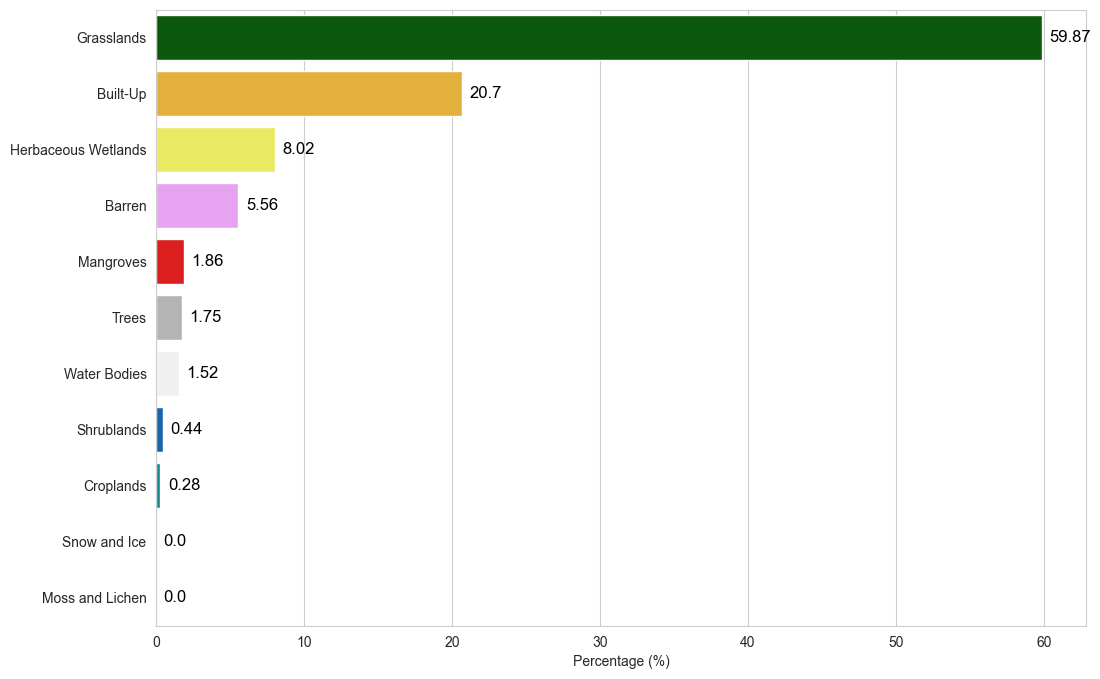

In [53]:
#make a bar chart, ordered descending by percentage
import matplotlib.pyplot as plt
import seaborn as sns
color_codes = ['#006400', '#FFBB22', '#FFFF4C', '#F096FF', '#FA0000', '#B4B4B4', '#F0F0F0', '#0064C8', '#0096A0', '#00CF75', '#FAE6A0']
land_cover_categories = ['Trees', 'Shrublands', 'Grasslands', 'Croplands', 'Built-Up', 'Barren', 'Snow and Ice', 'Water Bodies', 'Herbaceous Wetlands', 'Mangroves', 'Moss and Lichen']
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
#order descending by percentage
lc = lc.sort_values(by=['percentage'], ascending=False)
#add percentage to be just right of the bar, rounded to 2 decimal places
for index, row in lc.iterrows():
    ax.text(row.percentage+0.5, row.cover, str(round(row.percentage, 2)), color='black', ha="left", va='center', fontsize=12)

ax = sns.barplot(x="percentage", y="cover", data=lc, palette=color_codes)
ax.set(xlabel="Percentage (%)", ylabel="")
plt.show()